In [61]:
import numpy as np 
import pandas as pd
import re

In [62]:
file_ptr = open('E:\WhatsappAnalyzer\sample\sample-chat.txt', 'r', encoding='utf-8')

In [63]:
data = file_ptr.read()

In [64]:
print(data)

26/01/2020, 4:19 pm - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
24/01/2020, 8:25 pm - Tanay Kamath (TSEC, CS) created group "CODERS👨‍💻👩‍💻🖥💻"
26/01/2020, 4:19 pm - You joined using this group's invite link
26/01/2020, 4:20 pm - +91 99871 38558 joined using this group's invite link
26/01/2020, 4:20 pm - +91 91680 38866 joined using this group's invite link
26/01/2020, 4:22 pm - +91 72762 35231 joined using this group's invite link
26/01/2020, 4:22 pm - +91 88392 06534 joined using this group's invite link
26/01/2020, 4:23 pm - +91 98709 38217 joined using this group's invite link
26/01/2020, 4:23 pm - +91 98702 02065 joined using this group's invite link
26/01/2020, 4:23 pm - +91 91370 44426 joined using this group's invite link
26/01/2020, 4:25 pm - +91 86559 19035 joined using this group's invite link
26/01/2020, 4:25 pm - +91 79778 39093 joined using this group's invite link
26/01/2020, 4

In [65]:
len(data)

1275155

In [66]:
msg_pattern = '\d{1,2}/\d{1,2}/\d{4},\s\d{1,2}:\d{1,2}\s\w{2}\s-\s'

In [67]:
message = re.split(msg_pattern, data)[1:]
len(message)

13655

In [68]:
date_time = re.findall(msg_pattern,data)
len(date_time)

13655

In [69]:
message[0:5]

['Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n',
 'Tanay Kamath (TSEC, CS) created group "CODERS👨\u200d💻👩\u200d💻🖥💻"\n',
 "You joined using this group's invite link\n",
 "+91 99871 38558 joined using this group's invite link\n",
 "+91 91680 38866 joined using this group's invite link\n"]

In [70]:
date_time[0:5]

['26/01/2020, 4:19 pm - ',
 '24/01/2020, 8:25 pm - ',
 '26/01/2020, 4:19 pm - ',
 '26/01/2020, 4:20 pm - ',
 '26/01/2020, 4:20 pm - ']

In [71]:
df = pd.DataFrame({'message' : message, 'date-time' : date_time})
df['date-time'] = pd.to_datetime(df['date-time'], format='%d/%m/%Y, %I:%M %p - ')
df.head(3)

,message,date-time
0,Messages and calls are end-to-end encrypted. N...,2020-01-26 16:19:00
1,"Tanay Kamath (TSEC, CS) created group ""CODERS👨...",2020-01-24 20:25:00
2,You joined using this group's invite link\n,2020-01-26 16:19:00


In [72]:
df = pd.DataFrame({'message': message, 'date-time': date_time})
df['date-time'] = pd.to_datetime(df['date-time'], format='%d/%m/%Y, %I:%M %p - ')
df.head(3)

,message,date-time
0,Messages and calls are end-to-end encrypted. N...,2020-01-26 16:19:00
1,"Tanay Kamath (TSEC, CS) created group ""CODERS👨...",2020-01-24 20:25:00
2,You joined using this group's invite link\n,2020-01-26 16:19:00


In [73]:
df.shape

(13655, 2)

In [74]:
user = []
user_msg = []
for msg in df['message']:
    split_string = re.split(r"\s*:\s*", msg, maxsplit=1)
    if(len(split_string)) > 1 : 
        number = split_string[0]
        message = split_string[1]
        user.append(number)
        user_msg.append(message)
    else :
        user.append('Notification')
        user_msg.append(msg)

df['User'] = user 
df['Message'] = user_msg
df.drop(['message'], axis = 1, inplace=True)


In [75]:
df.head()

,date-time,User,Message
0,2020-01-26 16:19:00,Notification,Messages and calls are end-to-end encrypted. N...
1,2020-01-24 20:25:00,Notification,"Tanay Kamath (TSEC, CS) created group ""CODERS👨..."
2,2020-01-26 16:19:00,Notification,You joined using this group's invite link\n
3,2020-01-26 16:20:00,Notification,+91 99871 38558 joined using this group's invi...
4,2020-01-26 16:20:00,Notification,+91 91680 38866 joined using this group's invi...


In [76]:
df['day'] = df['date-time'].dt.day
df['month'] = df['date-time'].dt.month
df['year'] = df['date-time'].dt.year
df['hour'] = df['date-time'].dt.hour
df['minute'] = df['date-time'].dt.minute

In [77]:
df.head()

,date-time,User,Message,day,month,year,hour,minute
0,2020-01-26 16:19:00,Notification,Messages and calls are end-to-end encrypted. N...,26,1,2020,16,19
1,2020-01-24 20:25:00,Notification,"Tanay Kamath (TSEC, CS) created group ""CODERS👨...",24,1,2020,20,25
2,2020-01-26 16:19:00,Notification,You joined using this group's invite link\n,26,1,2020,16,19
3,2020-01-26 16:20:00,Notification,+91 99871 38558 joined using this group's invi...,26,1,2020,16,20
4,2020-01-26 16:20:00,Notification,+91 91680 38866 joined using this group's invi...,26,1,2020,16,20


In [78]:
##All message
len(df['Message'])

13655

In [79]:
# User defined 
len(df[df['User'] == 'Dheeraj Lalwani (TSEC, CS)'])

1937

In [80]:
# total words by user defined 
words = []
for msg in df[df['User'] == 'Ankit Rajput']['Message']:
    words.extend(msg.split())
len(words)

0

In [81]:
# Average word per message
import math
round(len(words)/len(df[df['User'] == 'Dheeraj Lalwani (TSEC, CS)']))

0

In [82]:
def word_stock(selected_user, df):
    df = df[df['User'] != 'Notification']
    df = df[df['Message'] != '<Media omitted>\n']
    if selected_user == 'All Users' :
        words = []
        for msg in df['Message']:
            words.extend(msg.split())
        return (len(list(set(words))), words)
    else :
        words = []
        for msg in df[df['User'] == selected_user]['Message']:
            words.extend(msg.split())
        return (len(list(set(words))), words)

In [83]:
_, word = word_stock('All Users', df)

In [84]:
df[df['Message'] == '<Media omitted>\n']

,date-time,User,Message,day,month,year,hour,minute
113,2020-01-27 19:31:00,+91 96536 93868,<Media omitted>\n,27,1,2020,19,31
145,2020-01-27 22:00:00,"Dheeraj Lalwani (TSEC, CS)",<Media omitted>\n,27,1,2020,22,0
156,2020-01-27 22:09:00,"Rohit Pathak (TSEC, CS)",<Media omitted>\n,27,1,2020,22,9
161,2020-01-27 22:10:00,+91 75078 05454,<Media omitted>\n,27,1,2020,22,10
170,2020-01-27 22:16:00,"Tanay Kamath (TSEC, CS)",<Media omitted>\n,27,1,2020,22,16
...,...,...,...,...,...,...,...,...
13576,2020-10-01 09:26:00,"Dheeraj Lalwani (TSEC, CS)",<Media omitted>\n,1,10,2020,9,26
13581,2020-10-01 10:05:00,Tushar Nankani,<Media omitted>\n,1,10,2020,10,5
13586,2020-10-01 10:42:00,+91 70219 80066,<Media omitted>\n,1,10,2020,10,42
13629,2020-10-01 15:29:00,"Shubham Chettiar (TSEC CS, TE)",<Media omitted>\n,1,10,2020,15,29


In [85]:
import emoji

In [86]:
emoji

<module 'emoji' from 'e:\\WhatsappAnalyzer\\venv\\lib\\site-packages\\emoji\\__init__.py'>

In [87]:
import warnings

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [88]:
# remving word that has only emojies
import re

def remove_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [89]:
list_without_emojis = [remove_emojis(text) for text in word]
my_list_without_empty = [element for element in list_without_emojis if element != '']
print(len(my_list_without_empty))

98964


In [90]:
pd.Series(my_list_without_empty).value_counts()

the                                                               2147
to                                                                1639
is                                                                1332
a                                                                 1256
I                                                                 1231
                                                                  ... 
that....I                                                            1
GitHub....                                                           1
here....                                                             1
Chip                                                                 1
https://twitter.com/DhiruCodes/status/1311873569882742784?s=08       1
Name: count, Length: 18195, dtype: int64

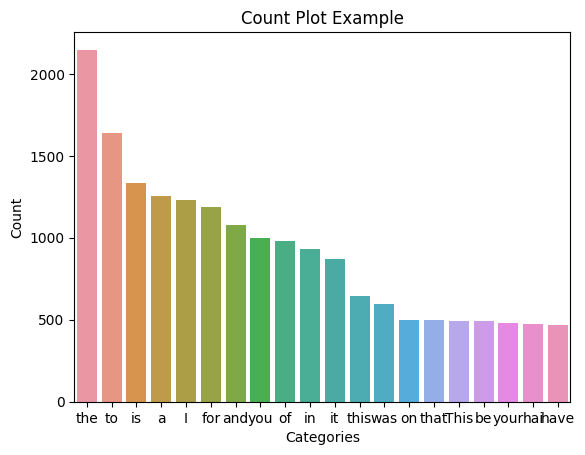

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a pandas Series from the data
series_data = pd.Series(my_list_without_empty)

# Generate the counts for each category
counts = series_data.value_counts()[:20]

# Create count plot
sns.barplot(x=counts.index, y=counts.values)

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Count Plot Example')

# Show the plot
plt.show()

In [42]:
import seaborn as sns
k = pd.DataFrame(my_list_without_empty)
k

,0
0,Give
1,it
2,a
3,try
4,....
...,...
98959,share
98960,it.
98961,thank
98962,you.


In [44]:
def total_days( df): 
    start_date = df['date-time'][0]
    end_date = df['date-time'].iloc[-1]
    total_days = (end_date - start_date).days + 1
    return total_days

In [45]:
total_days(df)

250

In [46]:
# Media shared
df[df['Message'] == '<Media omitted>\n']

,date-time,User,Message,day,month,year,hour,minute
113,2020-01-27 19:31:00,+91 96536 93868,<Media omitted>\n,27,1,2020,19,31
145,2020-01-27 22:00:00,"Dheeraj Lalwani (TSEC, CS)",<Media omitted>\n,27,1,2020,22,0
156,2020-01-27 22:09:00,"Rohit Pathak (TSEC, CS)",<Media omitted>\n,27,1,2020,22,9
161,2020-01-27 22:10:00,+91 75078 05454,<Media omitted>\n,27,1,2020,22,10
170,2020-01-27 22:16:00,"Tanay Kamath (TSEC, CS)",<Media omitted>\n,27,1,2020,22,16
...,...,...,...,...,...,...,...,...
13576,2020-10-01 09:26:00,"Dheeraj Lalwani (TSEC, CS)",<Media omitted>\n,1,10,2020,9,26
13581,2020-10-01 10:05:00,Tushar Nankani,<Media omitted>\n,1,10,2020,10,5
13586,2020-10-01 10:42:00,+91 70219 80066,<Media omitted>\n,1,10,2020,10,42
13629,2020-10-01 15:29:00,"Shubham Chettiar (TSEC CS, TE)",<Media omitted>\n,1,10,2020,15,29


In [47]:
import seaborn as sns

In [48]:
df['date'] = pd.to_datetime(df['year'] * 10000 + df['month'] * 100 + df['day'], format='%Y%m%d')

<Axes: xlabel='date', ylabel='count'>

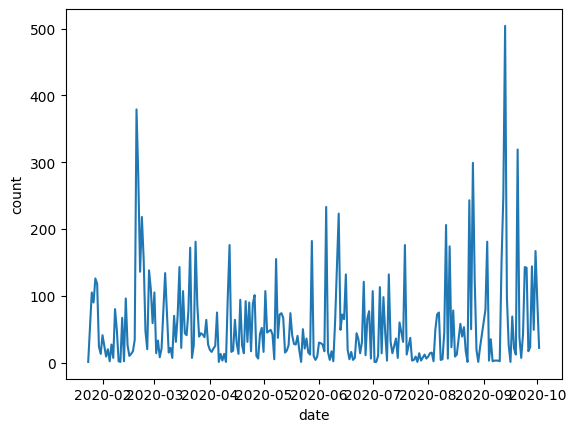

In [50]:
# particular dates message plot 
sns.lineplot(df['date'].value_counts())

In [51]:
df['User']

0                      Notification
1                      Notification
2                      Notification
3                      Notification
4                      Notification
                    ...            
13650     Darshan Rander (TSEC, IT)
13651     Darshan Rander (TSEC, IT)
13652       Tanay Kamath (TSEC, CS)
13653     Darshan Rander (TSEC, IT)
13654    Dheeraj Lalwani (TSEC, CS)
Name: User, Length: 13655, dtype: object

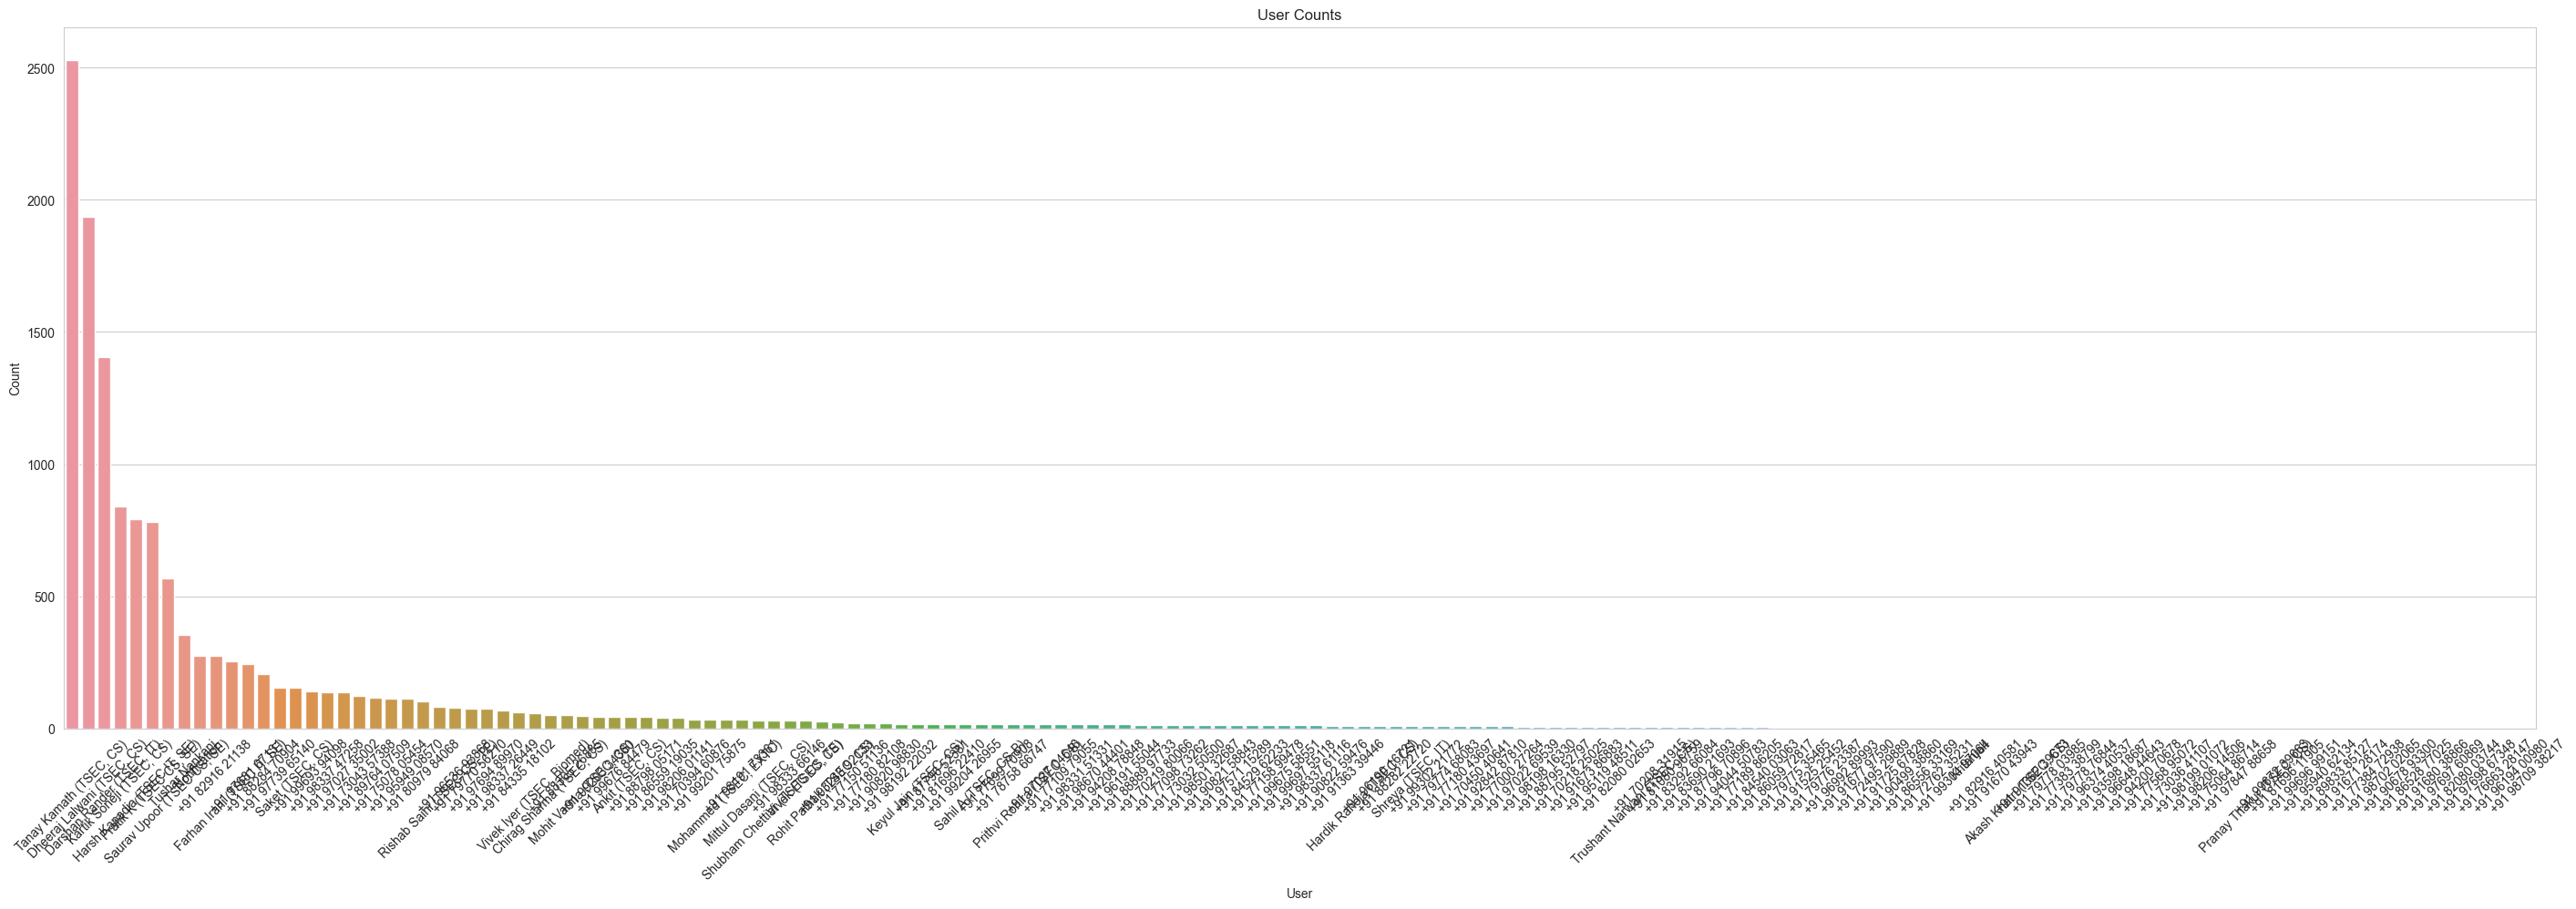

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize=(35, 10))
user_counts = df['User'].value_counts()
x = user_counts.index.tolist()
y = user_counts.tolist()
sns.set_style("whitegrid")
sns.barplot(x=x, y=y)

# Customize the plot
plt.xlabel('User')
plt.ylabel('Count')
plt.title('User Counts')

plt.xticks(rotation=45)

# Display the plot
plt.show()

In [54]:
import seaborn as sns

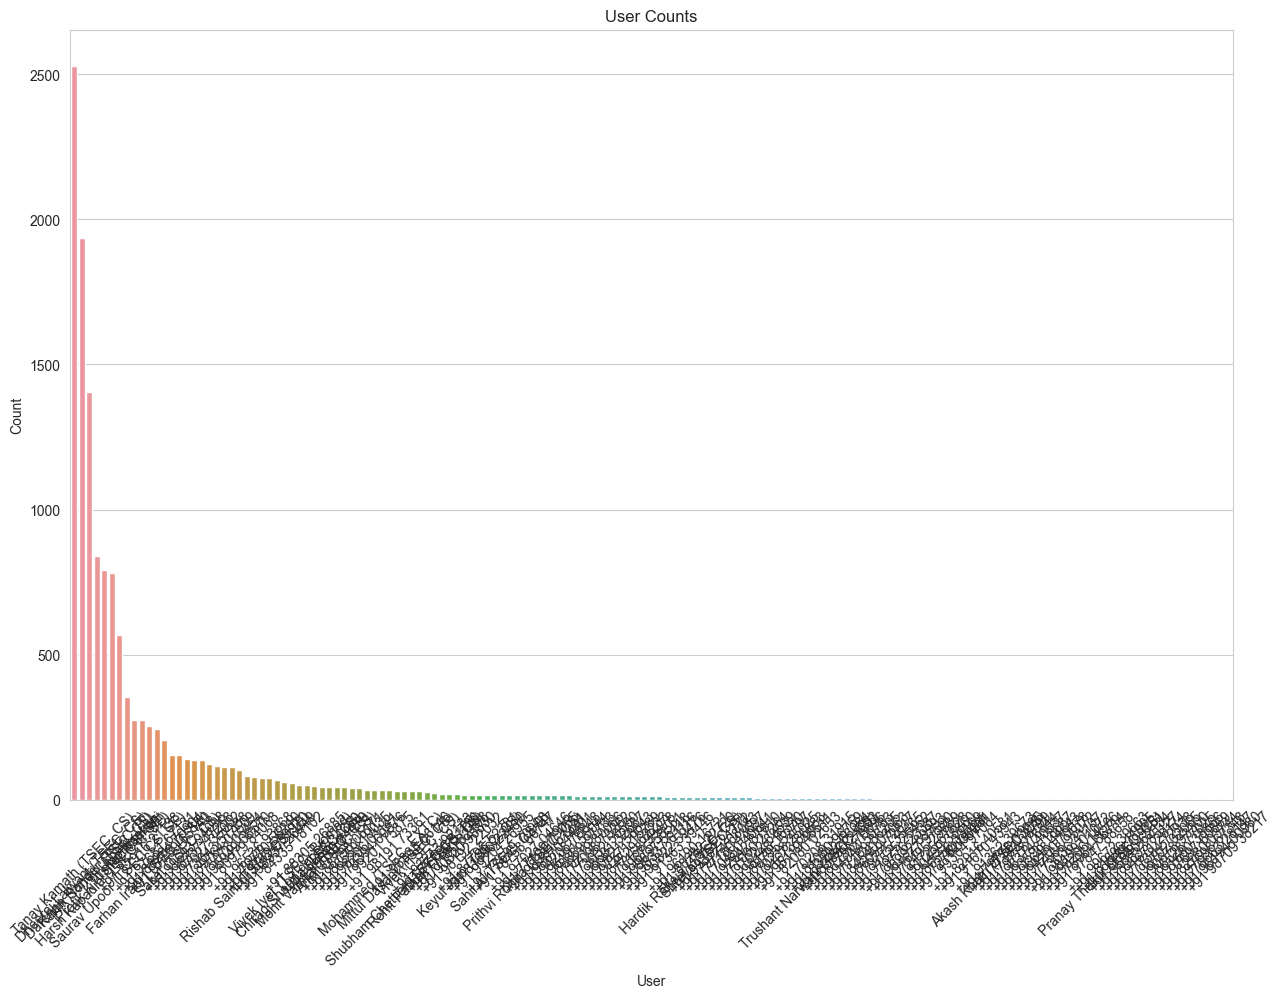

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
user_counts = df['User'].value_counts()
x = user_counts.index.tolist()
y = user_counts.tolist()
sns.set_style("whitegrid")
sns.barplot(x=x, y=y)

# Customize the plot
plt.xlabel('User')
plt.ylabel('Count')
plt.title('User Counts')

plt.xticks(rotation=45)

# Display the plot
plt.show()


In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

<Figure size 1500x1000 with 0 Axes>

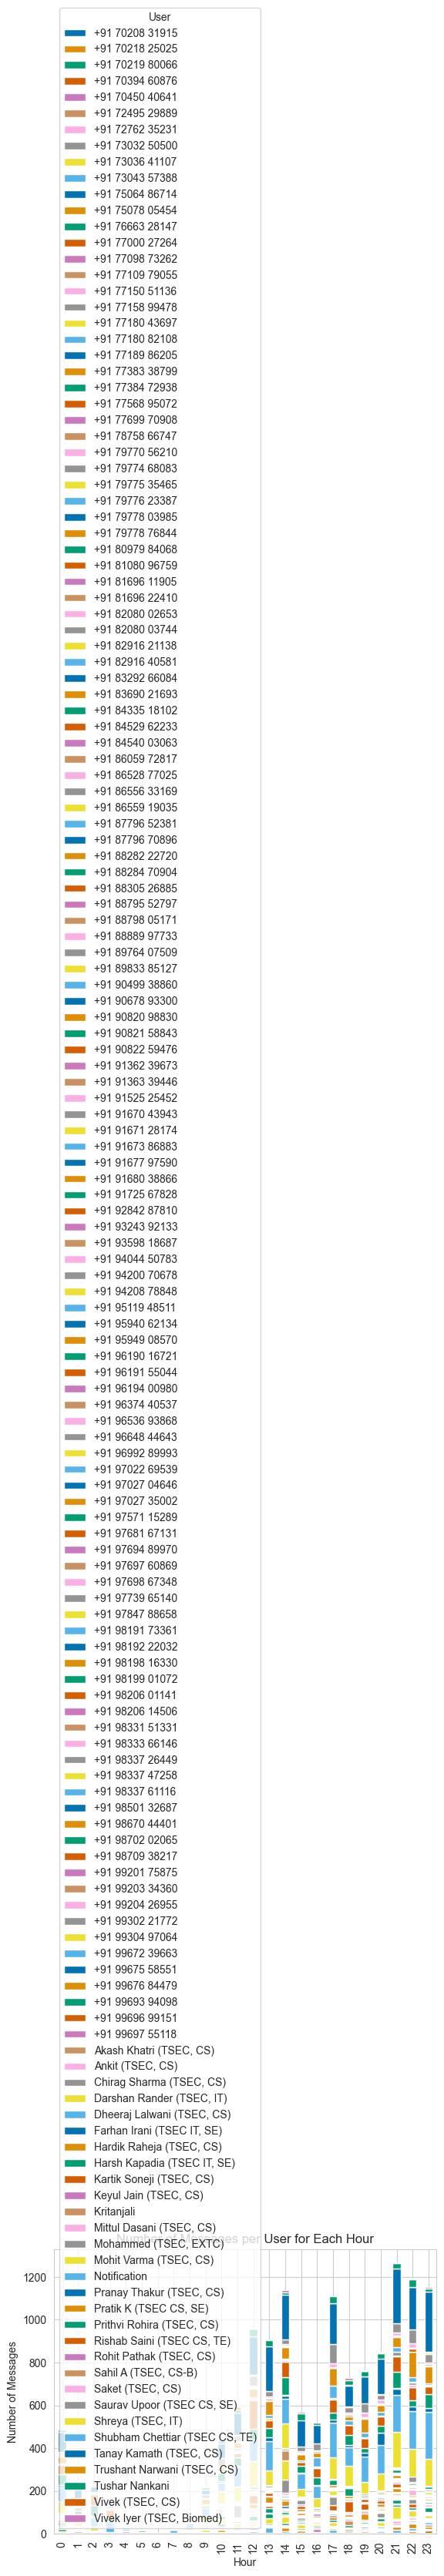

In [57]:
hour_user_counts = df.groupby(['hour', 'User']).size().reset_index(name='MessageCount')
# Pivot the data to create a wide-form DataFrame
pivot_df = hour_user_counts.pivot(index='hour', columns='User', values='MessageCount')
# Create the grouped bar plot
plt.figure(figsize=(15,10))
sns.set_palette('colorblind')  # Set the color palette
pivot_df.plot(kind='bar', stacked=True)
plt.xlabel('Hour')
plt.ylabel('Number of Messages')
plt.title('Number of Messages per User for Each Hour')
plt.legend(title='User')
plt.show()

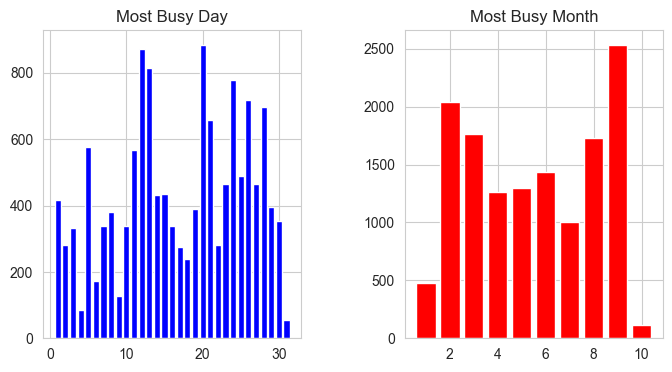

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Most busiest day
x1 = df['day'].value_counts().index.tolist()
y1 = df['day'].value_counts().tolist()

# Most busiest month
x2 = df['month'].value_counts().index.tolist()
y2 = df['month'].value_counts().tolist()

# Create a figure and subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

# Access the first subplot and plot the bar plot
axes[0].bar(x1, y1, color = 'blue')
axes[0].set_title('Most Busy Day')

# Access the second subplot and plot the bar plot
axes[1].bar(x2, y2, color = 'red')
axes[1].set_title('Most Busy Month')

# Adjust spacing between subplots if needed
plt.subplots_adjust(wspace=0.4)

# Display the figure
plt.show()

In [92]:
import emoji
emoji_list = []
for msg in df['Message']:
    emojis = emoji.emoji_list(msg)
    for i in emojis:
        emoji_list.append(i['emoji'])
print(emoji_list)
print(list(set(emoji_list)))

['👨\u200d💻', '👩\u200d💻', '🖥', '💻', '🤟', '👨\u200d💻', '👩\u200d💻', '🖥', '💻', '👨\u200d💻', '👩\u200d💻', '🖥', '💻', '😂', '😑', '👍', '👌', '😅', '😂', '✅', '❌', '👍🏻', '👍🏻', '👍🏻', '👍', '🤨', '👍🏻', '✌', '🤨', '👍', '👍🏻', '👍🏻', '👍🏻', '👍🏻', '👍🏻', '👍', '👍🏻', '👍', '👍', '✌', '😂', '😂', '🥺', '😂', '😂', '👍🏻', '👍', '👍', '👍🏻', '🤔', '🤔', '🤯', '🤯', '✌', '😅', '👍', '👍', '👍🏻', '👍🏻', '👍', '👍', '👍', '👆🏻', '😁', '😂', '🔥', '🙁', '👍', '😅', '😅', '🤔', '👍🏻', '😂', '😂', '🤦\u200d♂', '😂', '😂', '👆', '☝', '👍🏻', '👍🏻', '👍🏻', '😂', '👍', '😄', '👍🏻', '👍', '👍🏻', '💯', '👍', '☝', '👍🏻', '🤔', '😅', '😅', '😂', '🤦', '😂', '😅', '🙏🏻', '😅', '🙌🏻', '😁', '😁', '🙁', '😁', '👍🏻', '👍🏻', '👍', '👍', '👍🏻', '👍🏻', '👍', '👍', '👍', '👍🏻', '👍🏻', '😂', '😂', '😂', '😂', '👍🏻', '🤦\u200d♂', '👍', '😅', '🙄', '🙄', '😐', '👍', '☝🏼', '🤯', '🤣', '👍', '👍🏻', '👍🏻', '😂', '😂', '😂', '👆', '😅', '👍', '👍🏻', '👍🏻', '👍🏻', '😅', '🌚', '🌚', '😂', '🥺', '👍', '😅', '😅', '👍🏻', '👍🏻', '👍', '👍', '🙌', '🙌', '🙌', '😂', '😂', '😂', '💯', '😊', '😂', '😂', '😂', '😅', '😂', '💯', '💯', '💯', '😂', '💯', '😂', '👍', '😂', '😇', '🎊', '🎉', '🧠',

In [93]:
emoji_list = pd.DataFrame(emoji_list, columns=['emojis'])
emoji_list['emojis'].value_counts()[:5].index[4]

'💯'

In [94]:
print(emoji.emojize('\U0001fae5'))

🫥


In [95]:
print(emoji.emojize('🫥'))

🫥


In [96]:
df['day'].value_counts().index[0]

20